In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from tensorflow.keras import layers, models

path_ep ="/content/Electron-Photon-bilinear-tracker-(16, 16, 1).h5"
with h5py.File(path_ep, "r") as file:
    X_ep = np.array(file["X"])
    y_ep = np.array(file["y"])

In [2]:
def model_16():
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=(16, 16, 1)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model = model_16()

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,465 (619.00 KB)

 Trainable params: 158,465 (619.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ep, y_ep, test_size=0.2, random_state=42, stratify=y_ep)

In [4]:
import csv
import time
import numpy as np
import tensorflow as tf

# Initialize variables to store metrics
training_time = 0
inference_time = 0
final_train_accuracy = 0
final_test_accuracy = 0

# Assuming you have your data prepared as X_train, Y_train, X_test, Y_test
# And your model is already defined

# Start timing the training
start_time = time.time()

# Train the model
history = model.fit(
    np.array(X_train),
    np.array(Y_train),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# End timing the training
end_time = time.time()
training_time = end_time - start_time

# Get final accuracies
final_train_accuracy = history.history['accuracy'][-1] * 100
final_test_accuracy = history.history['val_accuracy'][-1] * 100

# Measure inference time
inference_start_time = time.time()
model.predict(np.array(X_test))
inference_end_time = time.time()
inference_time = inference_end_time - inference_start_time

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.6073 - loss: 0.6580 - val_accuracy: 0.6603 - val_loss: 0.6185
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6683 - loss: 0.6142 - val_accuracy: 0.6828 - val_loss: 0.6022
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6766 - loss: 0.6050 - val_accuracy: 0.6807 - val_loss: 0.6028
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6850 - loss: 0.5988 - val_accuracy: 0.6910 - val_loss: 0.5995
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6866 - loss: 0.5968 - val_accuracy: 0.6914 - val_loss: 0.5938
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6857 - loss: 0.5976 - val_accuracy: 0.6862 - val_loss: 0.5987
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6885 - loss: 0.5946 - val_accuracy: 0.6947 - val_loss: 0.5915
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6902 - loss: 0

In [5]:

# Prepare metrics for CSV
metrics = {
    'Optimizer': model.optimizer.__class__.__name__,
    'Learning_Rate': float(model.optimizer.learning_rate.numpy()),
    'Batch_Size': 32,
    'Epochs': 50,
    'Loss_Function': 'binary_crossentropy',
    'Training_Subset_Size': f"{len(X_train)} (80% of dataset due to validation_split)",
    'Training_Time': f"{training_time:.2f}",
    'Inference_Time': f"{inference_time:.2f}",
    'Final_Train_Accuracy': f"{final_train_accuracy:.2f}",
    'Final_Test_Accuracy': f"{final_test_accuracy:.2f}"
}

# Write metrics to CSV
csv_filename = 'tensorflow_model_metrics.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=metrics.keys())
    writer.writeheader()
    writer.writerow(metrics)

print(f"Metrics have been saved to {csv_filename}")

Metrics have been saved to tensorflow_model_metrics.csv


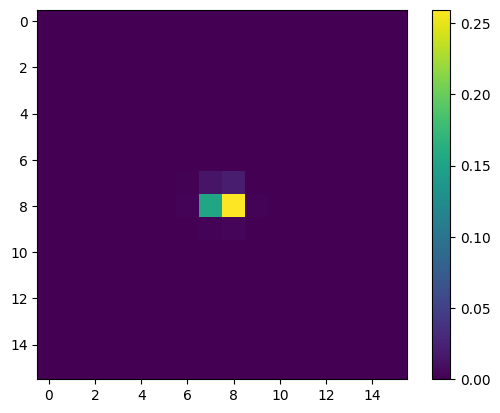

In [6]:
plt.imshow(X_train[0])
plt.colorbar()

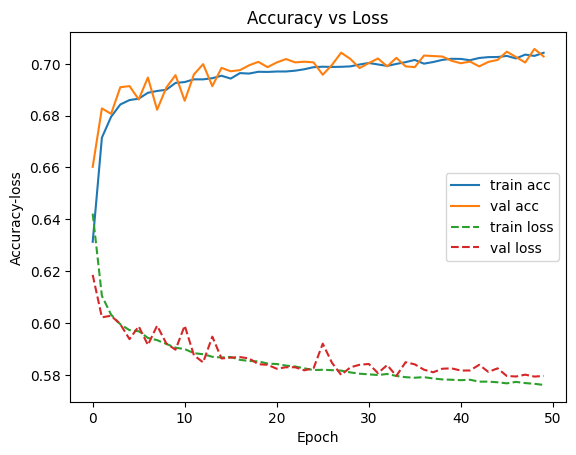

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train acc")
plt.plot(history.history['val_accuracy'], label ="val acc")

plt.plot(history.history['loss'], "--", label = "train loss")
plt.plot(history.history['val_loss'], "--", label = "val loss")
plt.title('Accuracy vs Loss')
plt.ylabel('Accuracy-loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()